## Howmework 2
## Shaorong Zhang (SID: 862394226)

In [2]:
import numpy as np
import random
from torchvision.datasets import MNIST
import time
import matplotlib.pyplot as plt

In [3]:
# Configuration
print_every = 1000
record_every = 1000
N_epochs = 10
batch_size = 10
N_train, N_test = 50000, 10000
N_batches = int(N_train / batch_size)

# 1. Download and Formatting the data
Your goal will be building a binary classifier for MNIST. This classifier will

• output 1 if the input image is a digit greater than 4 (i.e. digits 5,6,7,8,9).

• output 0 if the input image is a digit less than or equal to 4 (i.e. digits 0,1,2,3,4).
Towards this goal, we need to format the data to obtain a dataset $S = (x_i, y_i)_{i=1}^{N = 50000}$

In [4]:
# Function of formatting the data

def Formatting_data(mnist):
    # Convert inputs x to vectors of size 28 2= 784.
    X, targets = mnist.data.view(-1,784).float().numpy(), mnist.targets.numpy()
    # Standardize input images using z-normalization
    X = (X - np.mean(X))/np.std(X)
    # Add bias variable by concatenating 1 to your input
    ones = np.ones((len(X),1))
    X = np.append(X,ones, axis=-1)
    # Convert y to 0,1
    y = np.zeros_like(targets)
    y[targets >= 5] = 1
    return X, y.reshape(len(y),1)

In [5]:
# Download the training and test data
mnist_train = MNIST(root='./data', train=True, download=True)
mnist_test = MNIST(root='./data', train=False, download=True)
# Formatting the training and test data
X_train, y_train = Formatting_data(mnist_train)
X_test, y_test = Formatting_data(mnist_test)
print(X_train.shape)
print(X_test.shape)


(60000, 785)
(10000, 785)


# 2. Linear Classifier as a baseline

In [6]:
# plot loss
def Plot_Loss_Acc(t, Loss, Acc):
      plt.figure(figsize=(8,3), dpi = 300)
      plt.subplot(1,2,1)
      plt.plot(t, Loss,'k')
      plt.xlabel("Iteration")
      plt.ylabel("Training loss")
      plt.subplot(1,2,2)
      plt.plot(t, Acc,'k')
      plt.xlabel("Iteration")
      plt.ylabel("Test accuracy")
      plt.tight_layout()

In [7]:
# plot Training and Test accuracy
def Plot_Acc(t, Acc_train, Acc_test):
      plt.figure(figsize=(6,3), dpi = 300)
      plt.plot(t, Acc_train, label='Training accuracy')
      plt.plot(t, Acc_test, label='Test accuracy')
      plt.xlabel("Iteration")
      plt.ylabel("Accuracy")
      plt.legend(fontsize=7)
      plt.tight_layout()

In [8]:
def get_acc(y_hat, y):
    label_hat = np.zeros_like(y_hat)
    label_hat[y_hat > 0.5] = 1
    acc = np.sum(y == label_hat)/len(y_hat)
    return acc

In [9]:
# minibatch sgd for linear classifier
def minibatch_sgd_lc(B, eta):
    W = np.zeros((785, 1))
    Loss = []
    Acc = []
    Time = []
    t = 0
    for epoch in range(N_epochs):
        print("epoch{}".format(epoch+1))
        indices = list(range(N_train))
        random.shuffle(indices)
        for ITR in range(N_batches):
            t+=1
            indice = indices[ITR * 10 : ITR * 10 + 10]
            X_train_s, y_train_s = X_train[indice], y_train[indice] # sampling training and test data
            G = np.matmul(X_train_s.T, np.matmul(X_train_s, W) - y_train_s) / B
            W -= eta * G
            if (ITR+1) % record_every == 0:
                Time.append(t)
                loss = 0.5 * np.linalg.norm(np.matmul(X_train_s, W)- y_train_s) ** 2 / B
                Loss.append(loss)
                y_hat = np.matmul(X_test, W)
                acc = get_acc(y_hat, y_test)
                Acc.append(acc)
                if (ITR+1) % print_every == 0:
                    print(f'Iteration: [{ITR+1}/{N_batches}], Training loss: {loss:.4f}, Test accuracy: {acc*100: .2f}%')
    return W, Loss, Acc, Time

epoch1
Iteration: [1000/5000], Training loss: 0.1246, Test accuracy:  65.19%
Iteration: [2000/5000], Training loss: 0.0919, Test accuracy:  71.66%
Iteration: [3000/5000], Training loss: 0.0812, Test accuracy:  74.14%
Iteration: [4000/5000], Training loss: 0.0997, Test accuracy:  75.47%
Iteration: [5000/5000], Training loss: 0.0602, Test accuracy:  76.54%
epoch2
Iteration: [1000/5000], Training loss: 0.0481, Test accuracy:  77.32%
Iteration: [2000/5000], Training loss: 0.1291, Test accuracy:  77.91%
Iteration: [3000/5000], Training loss: 0.0328, Test accuracy:  78.32%
Iteration: [4000/5000], Training loss: 0.0719, Test accuracy:  78.63%
Iteration: [5000/5000], Training loss: 0.1025, Test accuracy:  79.13%
epoch3
Iteration: [1000/5000], Training loss: 0.1120, Test accuracy:  79.54%
Iteration: [2000/5000], Training loss: 0.0518, Test accuracy:  79.91%
Iteration: [3000/5000], Training loss: 0.0612, Test accuracy:  80.11%
Iteration: [4000/5000], Training loss: 0.0629, Test accuracy:  80.39%

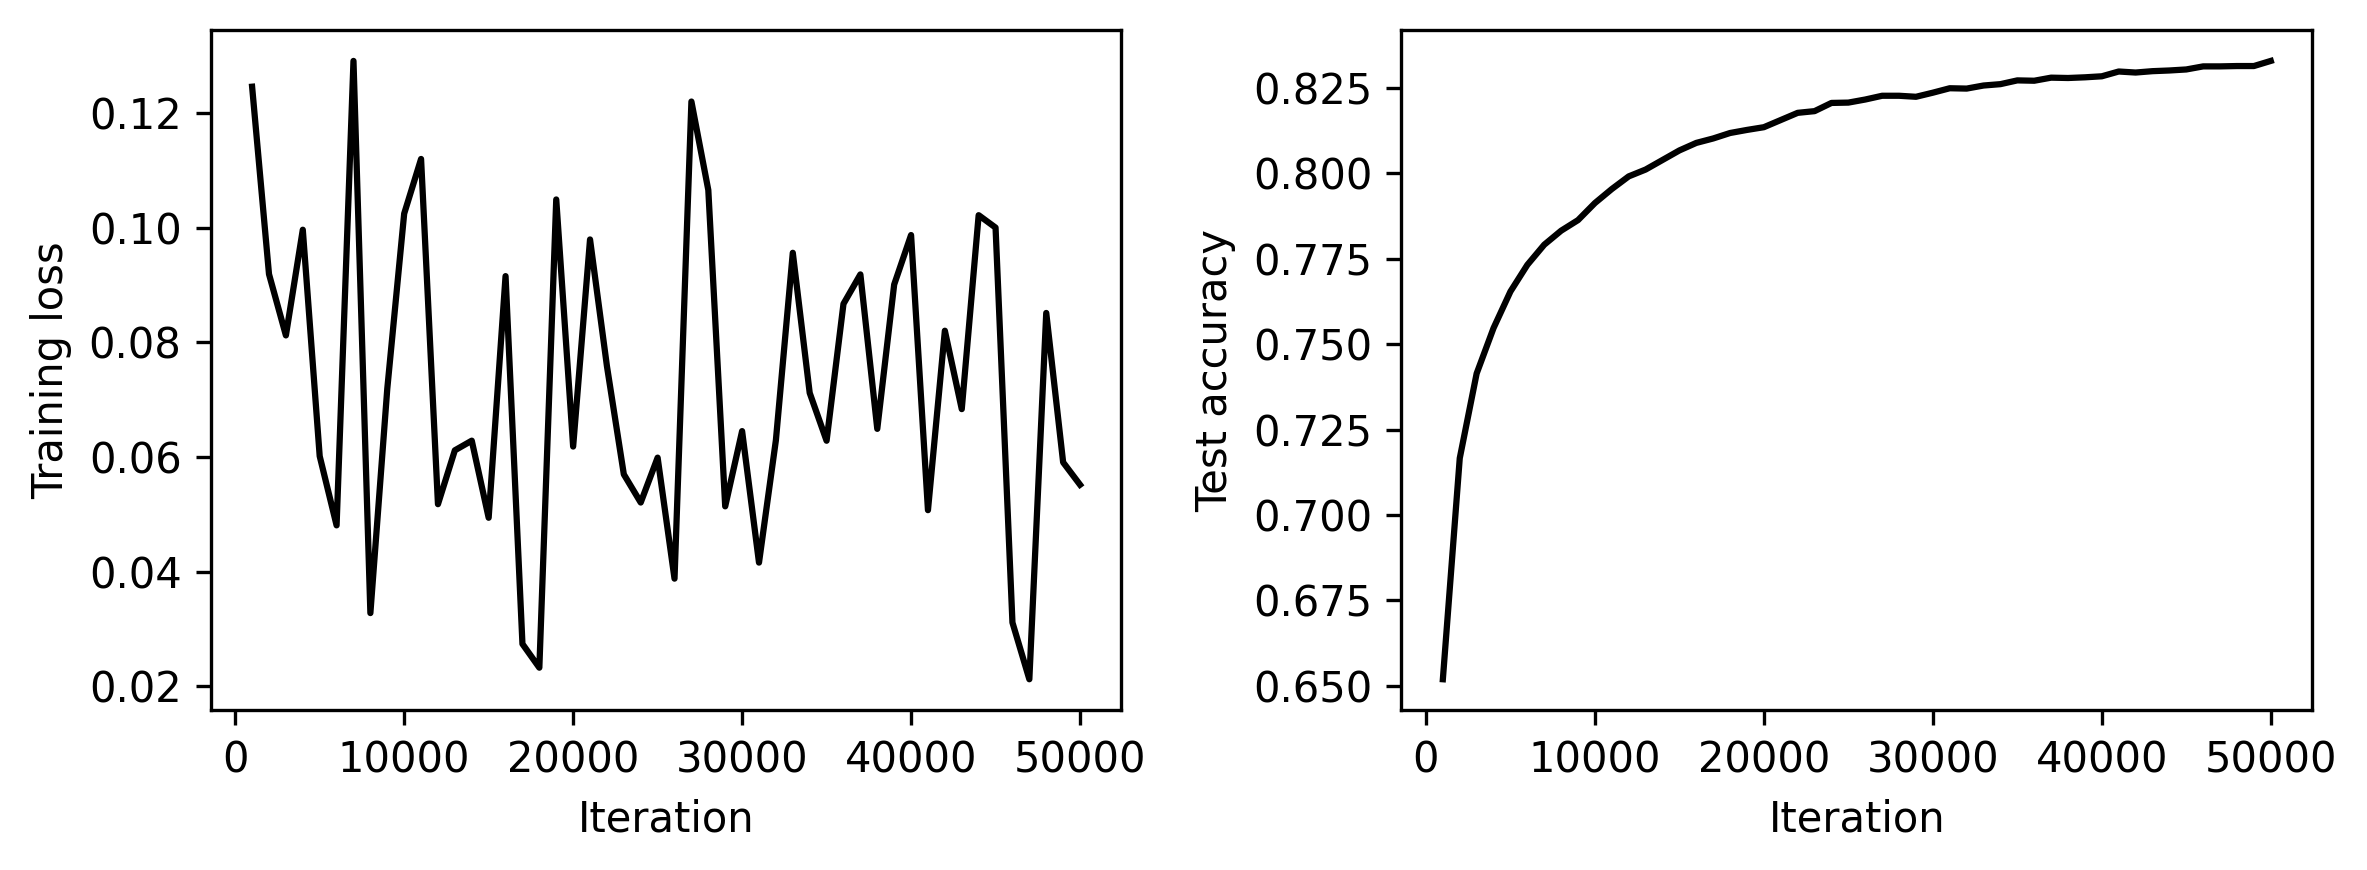

In [10]:
# SGD implementation for linear MNIST classifier.
tic = time.time()
_, Loss, Acc, t = minibatch_sgd_lc(B = 10, eta = 1e-5)
toc = time.time()
print(f"Training time: {toc - tic:.2f} sec")
# plot loss
Plot_Loss_Acc(t, Loss, Acc)

# 3. Train a neural network classifier with quadratic loss 
Quadratic loss: $l(y, f(x)) = (y - f(x))^2$.

Plot the progress of the test and training accuracy (y-axis) as a function of the iteration counter t (x-axis) 2 . Report the final test accuracy for the following choices.

In [12]:
def ReLU(x):
    return np.maximum(x, 0)

def dReLU(x):
    return 1. * (x > 0)

In [13]:
print(X_train.shape)
k = 50
w = np.random.normal(0, 1.0/k, [k, 785])
w.dot(X_train.T)
v = np.random.normal(0, 1.0/100, [k, 1])
v.shape

(60000, 785)


(50, 1)

In [15]:
class NN:
    def __init__(self, k, lr):
        # Xavier initialization
        self.w = np.random.normal(0, 1.0/k, [k, 785])
        self.v = np.random.normal(0, 1.0/100, [k, 1])
        self.lr = lr
    def forward(self, X): # input X: N by 785
        h = ReLU(np.dot(self.w, X.T)) # h: k by N
        y_hat = np.matmul(self.v.T, h).T # y_hat: 1 by N
        return y_hat # output y: 1 by N
    def backward(self, X, y):
        # forward
        h = ReLU(np.dot(self.w, X.T)) # h: k by N
        y_hat = np.matmul(self.v.T, h).T # y_hat: 1 by N
        # backward
        dy_hat = y_hat-y # 
        dv = np.matmul(h, dy_hat) # 
        dw = self.v @ (y_hat - y).T * dReLU(np.dot(self.w, X.T)) @ X
        self.v -= self.lr * dv
        self.w -= self.lr * dw

In [37]:
def minibatch_sgd_nn(B, lr, k):
    W = np.zeros((785, 1))
    Loss = []
    Acc_test = []
    Acc_train = []
    Time = []
    t = 0
    model = NN(k=k, lr=lr)
    for epoch in range(N_epochs):
        print("epoch{}".format(epoch+1))
        indices = list(range(N_train))
        random.shuffle(indices)
        for ITR in range(N_batches):
            t+=1
            indice = indices[ITR * 10 : ITR * 10 + 10]
            X_train_s, y_train_s = X_train[indice], y_train[indice] # sampling training and test data
            model.backward(X = X_train_s, y=y_train_s)

            if (ITR+1) % record_every == 0:
                Time.append(t)
                # Calculate loss
                y_train_s_hat = model.forward(X_train_s)
                loss = 0.5 * np.linalg.norm(y_train_s_hat- y_train_s) ** 2 / B
                Loss.append(loss)
                # Calculate accuracy
                y_train_hat = model.forward(X_train)
                acc_train = get_acc(y_train_hat, y_train)
                Acc_train.append(acc_train)
                y_hat = model.forward(X_test)
                acc_test = get_acc(y_hat, y_test)
                Acc_test.append(acc_test)
                if (ITR+1) % print_every == 0:
                    print(f'Iteration: [{ITR+1}/{N_batches}], Training loss: {loss:.4f}, Training accuracy: {acc_train*100: .2f}%, Test accuracy: {acc_test*100: .2f}%')
    return Loss, Acc_train, Acc_test, Time

## Neural network classifier with quadratic loss with k = 5

epoch1
Iteration: [1000/5000], Training loss: 0.1030, Training accuracy:  68.46%, Test accuracy:  70.22%
Iteration: [2000/5000], Training loss: 0.0593, Training accuracy:  73.07%, Test accuracy:  74.26%
Iteration: [3000/5000], Training loss: 0.1294, Training accuracy:  76.47%, Test accuracy:  77.65%
Iteration: [4000/5000], Training loss: 0.0511, Training accuracy:  78.79%, Test accuracy:  79.68%
Iteration: [5000/5000], Training loss: 0.0499, Training accuracy:  79.40%, Test accuracy:  80.32%
epoch2
Iteration: [1000/5000], Training loss: 0.0497, Training accuracy:  80.97%, Test accuracy:  81.84%
Iteration: [2000/5000], Training loss: 0.0590, Training accuracy:  82.23%, Test accuracy:  83.02%
Iteration: [3000/5000], Training loss: 0.0941, Training accuracy:  82.68%, Test accuracy:  83.12%
Iteration: [4000/5000], Training loss: 0.0625, Training accuracy:  83.44%, Test accuracy:  83.87%
Iteration: [5000/5000], Training loss: 0.0283, Training accuracy:  81.96%, Test accuracy:  82.64%
epoch3

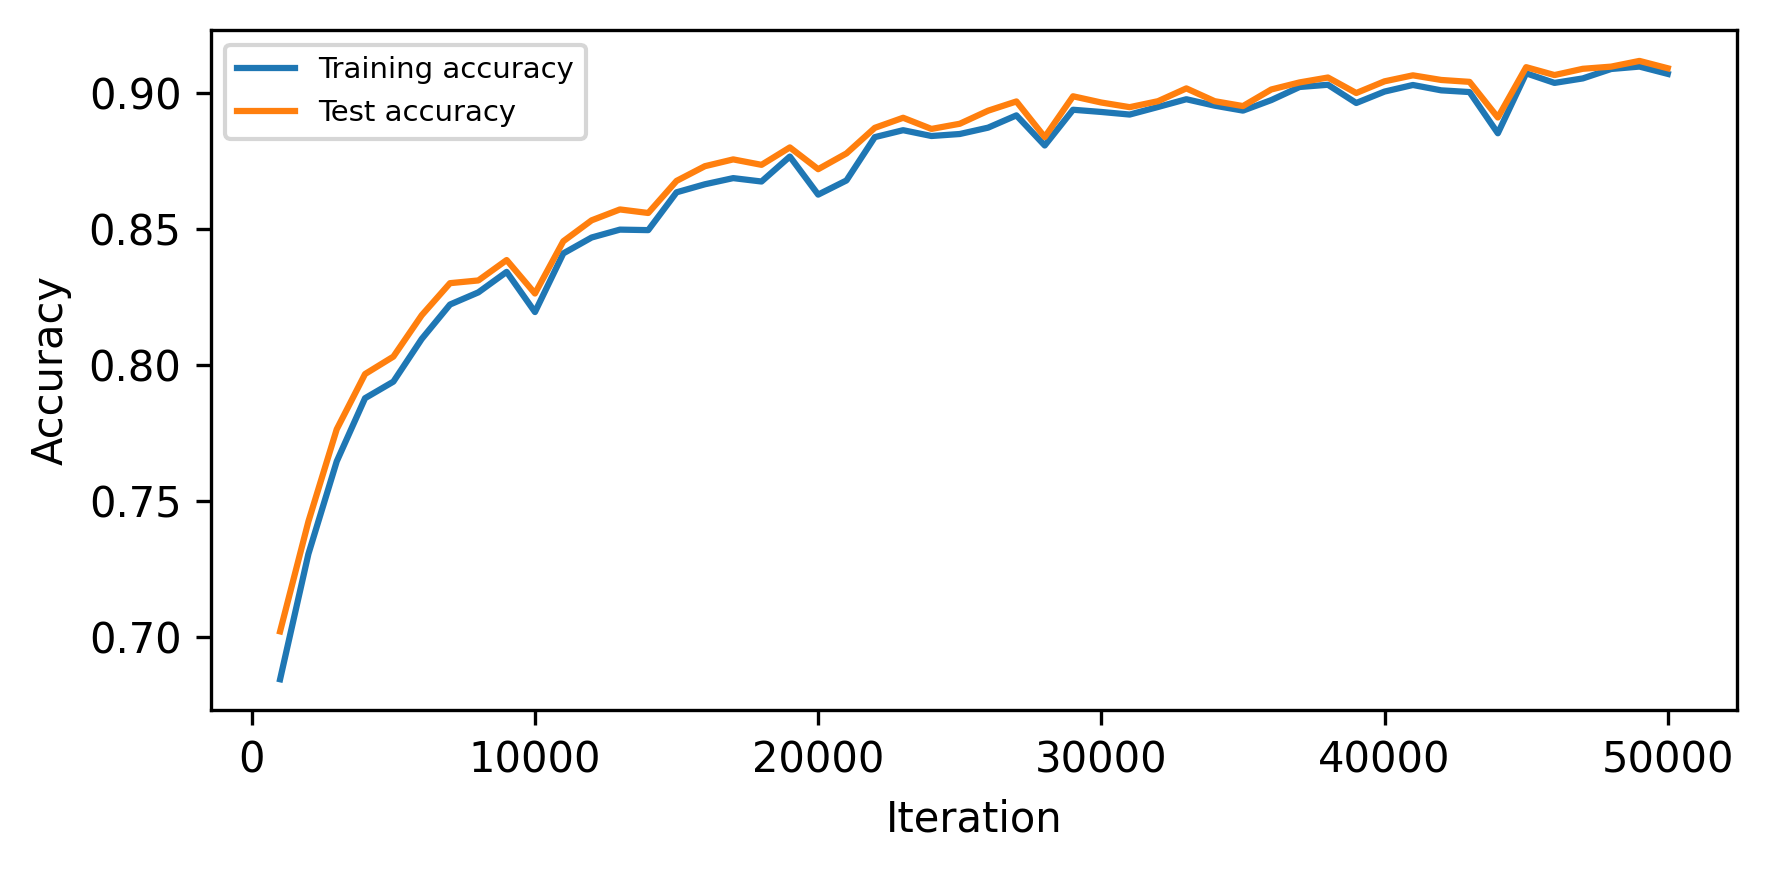

In [38]:
# SGD implementation for NN classifier.
tic = time.time()
Loss, Acc_train, Acc_test, t = minibatch_sgd_nn(B = 10, lr = 1e-3, k=5)
toc = time.time()
print(f"Training time: {toc - tic:.2f} sec")
# plot acc
# Plot_Loss_Acc(t, Loss, Acc)
Plot_Acc(t,Acc_train, Acc_test)

## Neural network classifier with quadratic loss with k = 40

epoch1
Iteration: [1000/5000], Training loss: 0.0185, Training accuracy:  88.42%, Test accuracy:  88.75%
Iteration: [2000/5000], Training loss: 0.0150, Training accuracy:  93.02%, Test accuracy:  92.82%
Iteration: [3000/5000], Training loss: 0.0256, Training accuracy:  94.47%, Test accuracy:  94.32%
Iteration: [4000/5000], Training loss: 0.0169, Training accuracy:  95.11%, Test accuracy:  94.91%
Iteration: [5000/5000], Training loss: 0.0153, Training accuracy:  95.72%, Test accuracy:  95.52%
epoch2
Iteration: [1000/5000], Training loss: 0.0147, Training accuracy:  96.02%, Test accuracy:  95.74%
Iteration: [2000/5000], Training loss: 0.0138, Training accuracy:  96.28%, Test accuracy:  96.19%
Iteration: [3000/5000], Training loss: 0.0135, Training accuracy:  96.39%, Test accuracy:  96.41%
Iteration: [4000/5000], Training loss: 0.0134, Training accuracy:  96.52%, Test accuracy:  96.16%
Iteration: [5000/5000], Training loss: 0.0062, Training accuracy:  96.89%, Test accuracy:  96.58%
epoch3

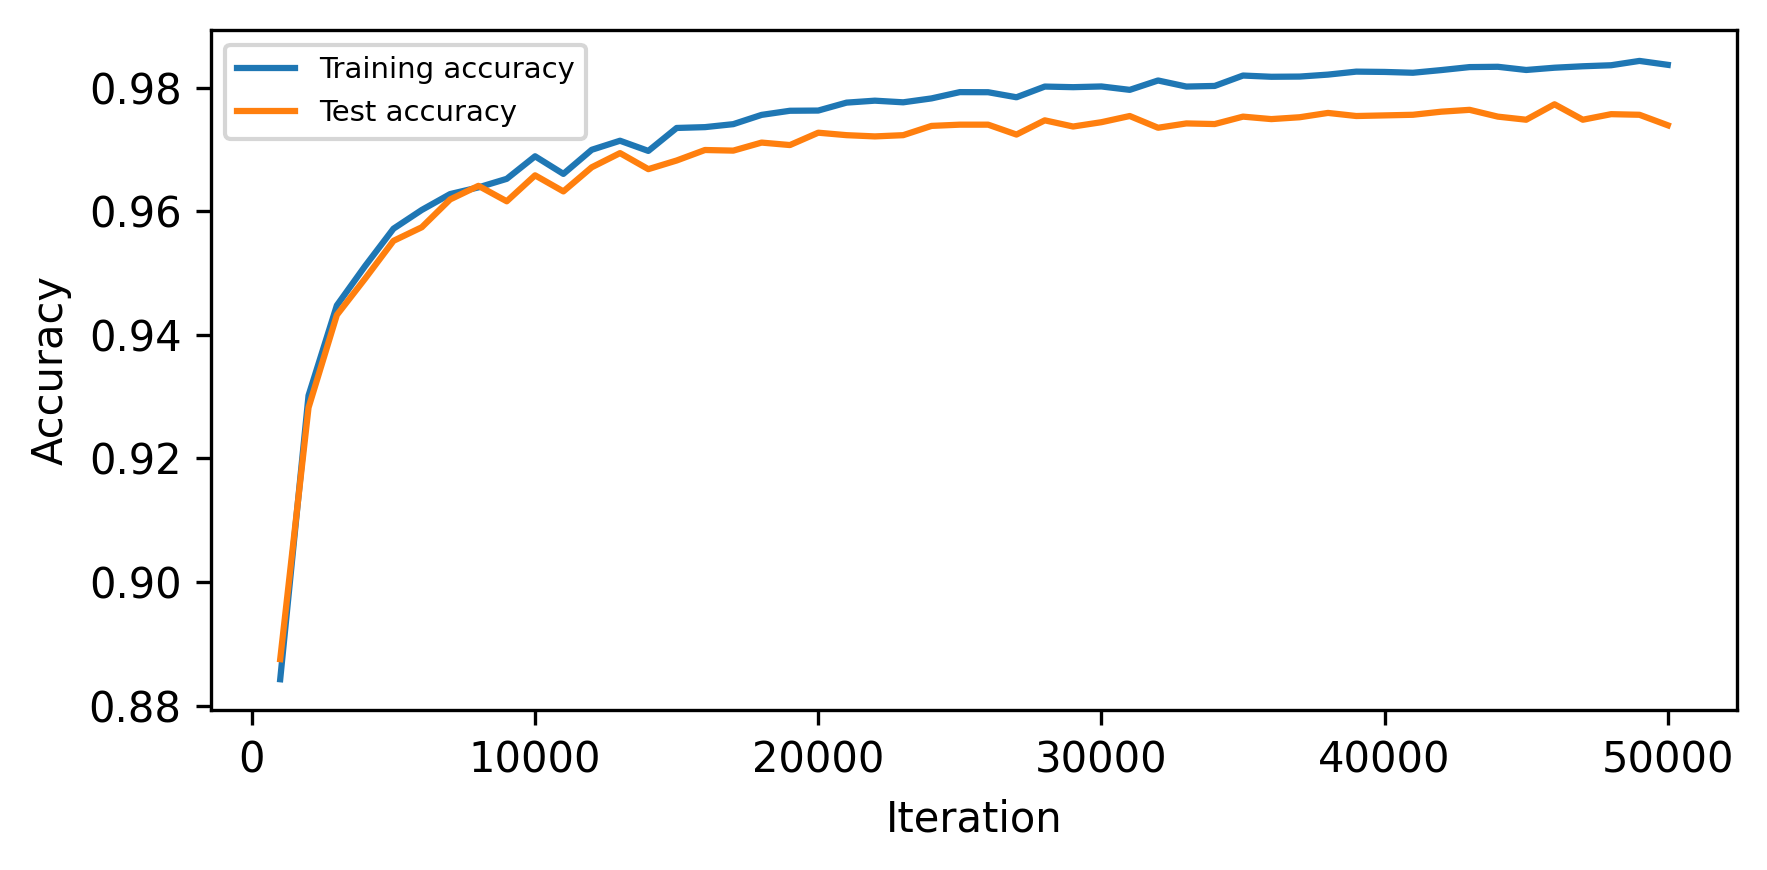

In [39]:
# SGD implementation for NN classifier.
tic = time.time()
Loss, Acc_train, Acc_test, t = minibatch_sgd_nn(B = 10, lr = 1e-3, k=40)
toc = time.time()
print(f"Training time: {toc - tic:.2f} sec")
# plot loss
# Plot_Loss_Acc(t, Loss, Acc)
Plot_Acc(t,Acc_train, Acc_test)

## Neural network classifier with quadratic loss with k = 200

epoch1
Iteration: [1000/5000], Training loss: 0.0313, Training accuracy:  89.83%, Test accuracy:  90.08%
Iteration: [2000/5000], Training loss: 0.0099, Training accuracy:  94.27%, Test accuracy:  94.28%
Iteration: [3000/5000], Training loss: 0.0307, Training accuracy:  95.96%, Test accuracy:  95.63%
Iteration: [4000/5000], Training loss: 0.0053, Training accuracy:  96.68%, Test accuracy:  96.45%
Iteration: [5000/5000], Training loss: 0.0165, Training accuracy:  96.91%, Test accuracy:  96.70%
epoch2
Iteration: [1000/5000], Training loss: 0.0071, Training accuracy:  97.37%, Test accuracy:  96.85%
Iteration: [2000/5000], Training loss: 0.0214, Training accuracy:  97.38%, Test accuracy:  96.96%
Iteration: [3000/5000], Training loss: 0.0079, Training accuracy:  97.60%, Test accuracy:  97.26%
Iteration: [4000/5000], Training loss: 0.0076, Training accuracy:  97.79%, Test accuracy:  97.27%
Iteration: [5000/5000], Training loss: 0.0260, Training accuracy:  97.97%, Test accuracy:  97.42%
epoch3

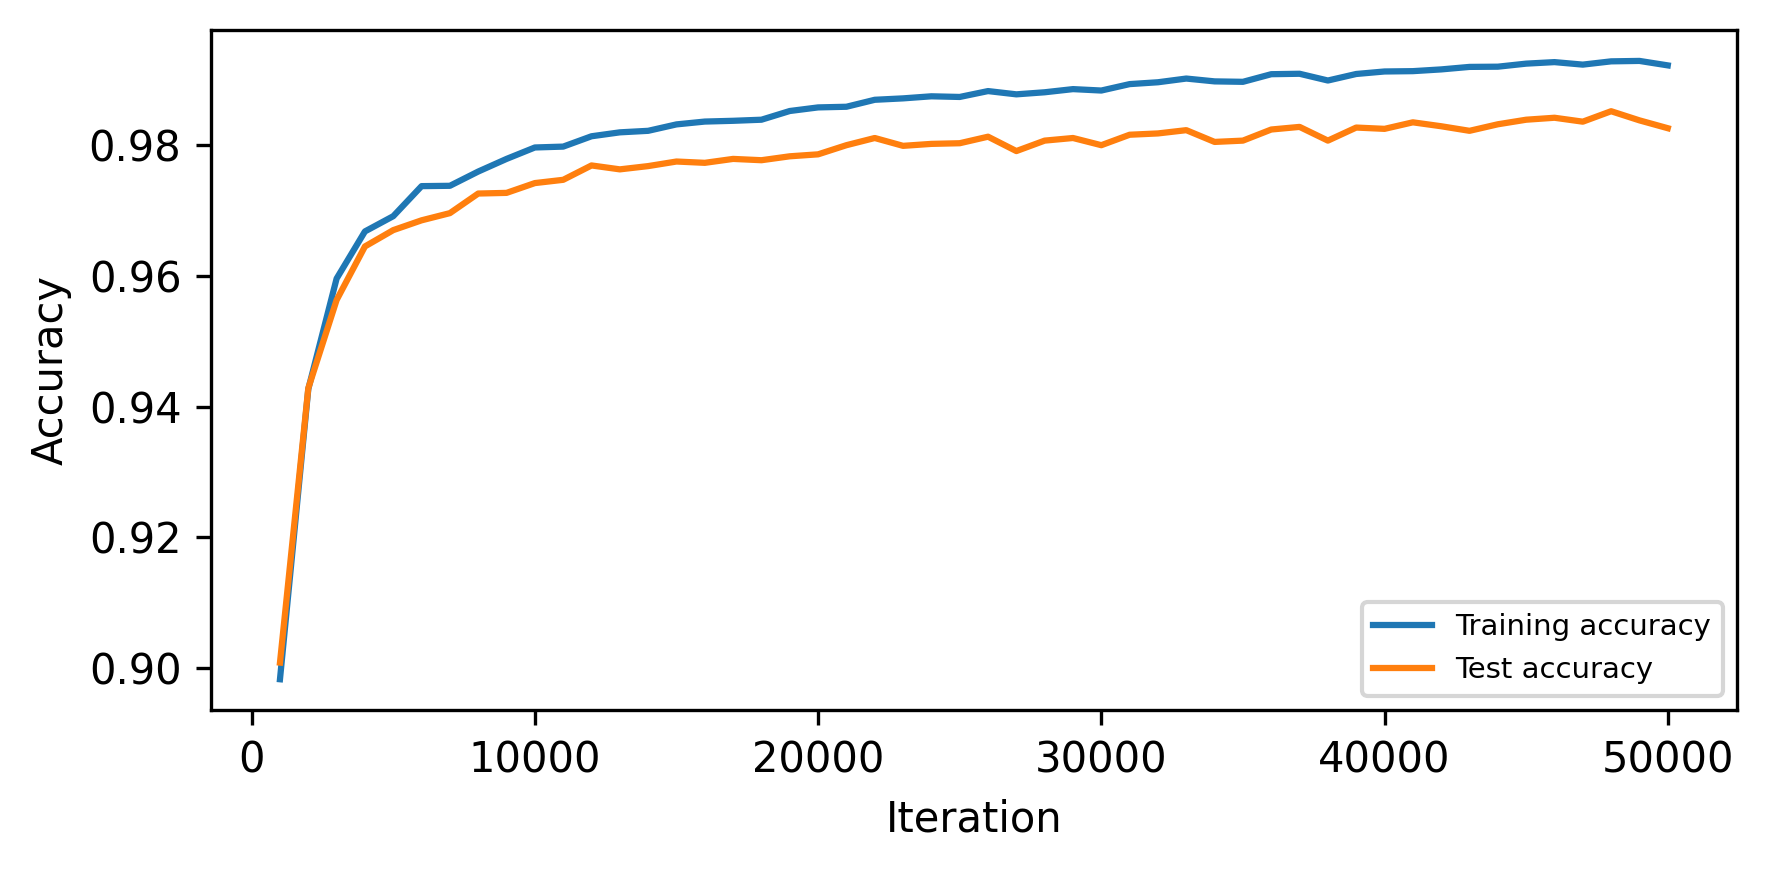

In [40]:
# SGD implementation for NN classifier.
tic = time.time()
Loss, Acc_train, Acc_test, t = minibatch_sgd_nn(B = 10, lr = 1e-3, k=200)
toc = time.time()
print(f"Training time: {toc - tic:.2f} sec")
# plot loss
# Plot_Loss_Acc(t, Loss, Acc)
Plot_Acc(t,Acc_train, Acc_test)

# 4. Train a neural network classifier with logistic loss

In [24]:
def sigmoid(x):
    if x < 1e-2:
        return 0
    return 1 / (1 + np.exp(-x))

def logistic_loss(y_hat, y):
    y_hat[y_hat<1e-10] = 1e-10
    y_hat[y_hat>1-1e-10] = 1-1e-10
    loss = -y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)
    return loss


In [25]:
class NN_logistic:
    def __init__(self, k, lr):
        # Xavier initialization
        self.w = np.random.normal(0, 1.0/k, [k, 785])
        self.v = np.random.normal(0, 1.0/100, [k, 1])
        self.lr = lr
    def forward(self, X): # input X: N by 785
        h = ReLU(np.dot(self.w, X.T)) # h: k by N
        y_hat = np.matmul(self.v.T, h).T # y_hat: 1 by N
        return sigmoid(y_hat) # output y: 1 by N
    def backward(self, X, y):
        # forward
        h = ReLU(np.dot(self.w, X.T)) # h: k by N
        y_hat = np.matmul(self.v.T, h).T # y_hat: 1 by N
        # backward
        dy_hat = sigmoid(y_hat)-y # 
        dv = np.matmul(h, dy_hat) # 
        dw = self.v @ (y_hat - y).T * dReLU(np.dot(self.w, X.T)) @ X
        self.v -= self.lr * dv
        self.w -= self.lr * dw

In [32]:
def minibatch_sgd_nn_l(B, lr, k):
    W = np.zeros((785, 1))
    Loss = []
    Acc_test = []
    Acc_train = []
    Time = []
    t = 0
    model = NN(k=k, lr=lr)
    for epoch in range(N_epochs):
        print("epoch{}".format(epoch+1))
        indices = list(range(N_train))
        random.shuffle(indices)
        for ITR in range(N_batches):
            t+=1
            indice = indices[ITR * 10 : ITR * 10 + 10]
            X_train_s, y_train_s = X_train[indice], y_train[indice] # sampling training and test data
            model.backward(X = X_train_s, y=y_train_s)
            if (ITR+1) % record_every == 0:
                Time.append(t)
                # Calculate loss
                y_train_s_hat = model.forward(X_train_s)
                loss = logistic_loss(y_train_s_hat, y_train_s)
                loss = loss.sum() / B
                Loss.append(loss)
                # Calculate training accuracy
                y_train_hat = model.forward(X_train)
                acc_train = get_acc(y_train_hat, y_train)
                Acc_train.append(acc_train)
                # Calculate test accuracy
                y_hat = model.forward(X_test)
                acc_test = get_acc(y_hat, y_test)
                Acc_test.append(acc_test)
                if (ITR+1) % print_every == 0:
                    print(f'Iteration: [{ITR+1}/{N_batches}], Training loss: {loss:.4f}, Training accuracy: {acc_train*100: .2f}%, Test accuracy: {acc_test*100: .2f}%')
    return Loss, Acc_train, Acc_test, Time

# Neural network classifier with logistic loss with k = 5

epoch1
Iteration: [1000/5000], Training loss: 0.1536, Training accuracy:  65.63%, Test accuracy:  66.47%
Iteration: [2000/5000], Training loss: 0.6014, Training accuracy:  72.48%, Test accuracy:  73.29%
Iteration: [3000/5000], Training loss: 0.3020, Training accuracy:  77.32%, Test accuracy:  77.90%
Iteration: [4000/5000], Training loss: 0.6375, Training accuracy:  78.73%, Test accuracy:  79.02%
Iteration: [5000/5000], Training loss: 0.2786, Training accuracy:  79.47%, Test accuracy:  80.32%
epoch2
Iteration: [1000/5000], Training loss: 0.3580, Training accuracy:  80.90%, Test accuracy:  81.47%
Iteration: [2000/5000], Training loss: 0.2322, Training accuracy:  81.47%, Test accuracy:  82.12%
Iteration: [3000/5000], Training loss: 0.2086, Training accuracy:  82.67%, Test accuracy:  83.12%
Iteration: [4000/5000], Training loss: 0.2841, Training accuracy:  83.06%, Test accuracy:  83.55%
Iteration: [5000/5000], Training loss: 0.4903, Training accuracy:  83.91%, Test accuracy:  84.41%
epoch3

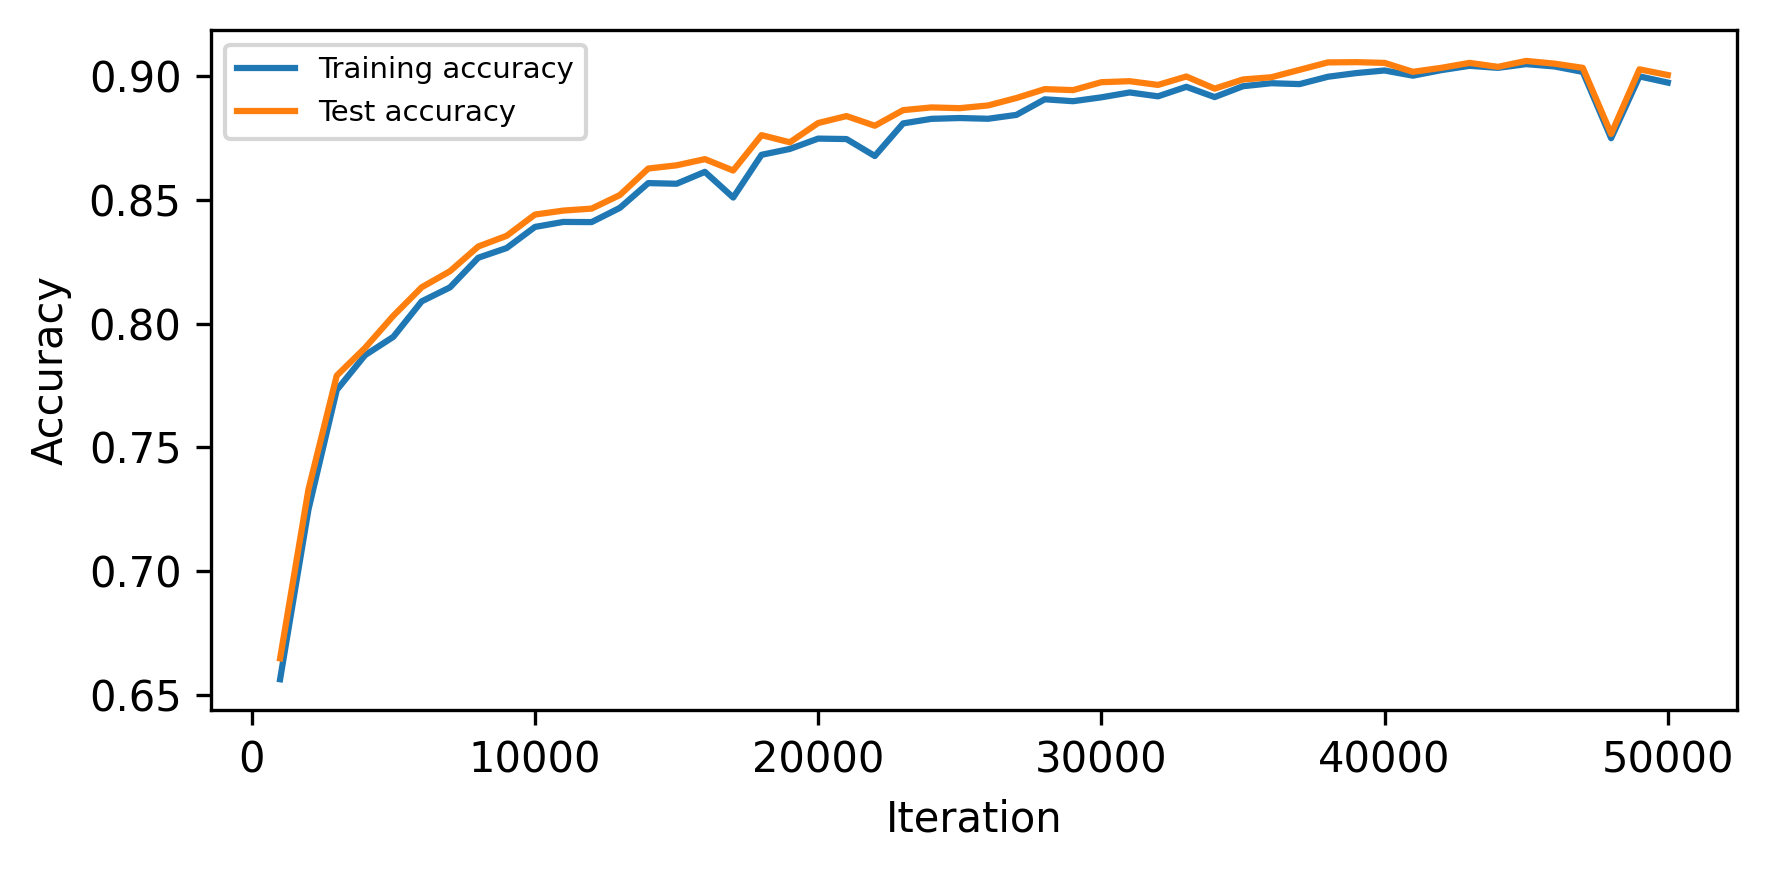

In [33]:
# SGD implementation for NN classifier.
tic = time.time()
Loss, Acc_train, Acc_test, t = minibatch_sgd_nn_l(B = 10, lr = 1e-3, k=5)
toc = time.time()
print(f"Training time: {toc - tic:.2f} sec")
# plot loss
# Plot_Loss_Acc(t, Loss, Acc)
Plot_Acc(t, Acc_train, Acc_test)

## Neural network classifier with logistic loss with k = 40

epoch1
Iteration: [1000/5000], Training loss: 0.2788, Training accuracy:  89.09%, Test accuracy:  89.56%
Iteration: [2000/5000], Training loss: 0.0852, Training accuracy:  93.35%, Test accuracy:  93.31%
Iteration: [3000/5000], Training loss: 0.1092, Training accuracy:  94.62%, Test accuracy:  94.68%
Iteration: [4000/5000], Training loss: 0.1473, Training accuracy:  95.21%, Test accuracy:  95.08%
Iteration: [5000/5000], Training loss: 0.1896, Training accuracy:  95.30%, Test accuracy:  94.91%
epoch2
Iteration: [1000/5000], Training loss: 0.0863, Training accuracy:  95.88%, Test accuracy:  95.71%
Iteration: [2000/5000], Training loss: 0.1714, Training accuracy:  96.07%, Test accuracy:  95.65%
Iteration: [3000/5000], Training loss: 0.1246, Training accuracy:  96.23%, Test accuracy:  95.65%
Iteration: [4000/5000], Training loss: 0.0667, Training accuracy:  96.44%, Test accuracy:  96.14%
Iteration: [5000/5000], Training loss: 0.0797, Training accuracy:  96.59%, Test accuracy:  96.14%
epoch3

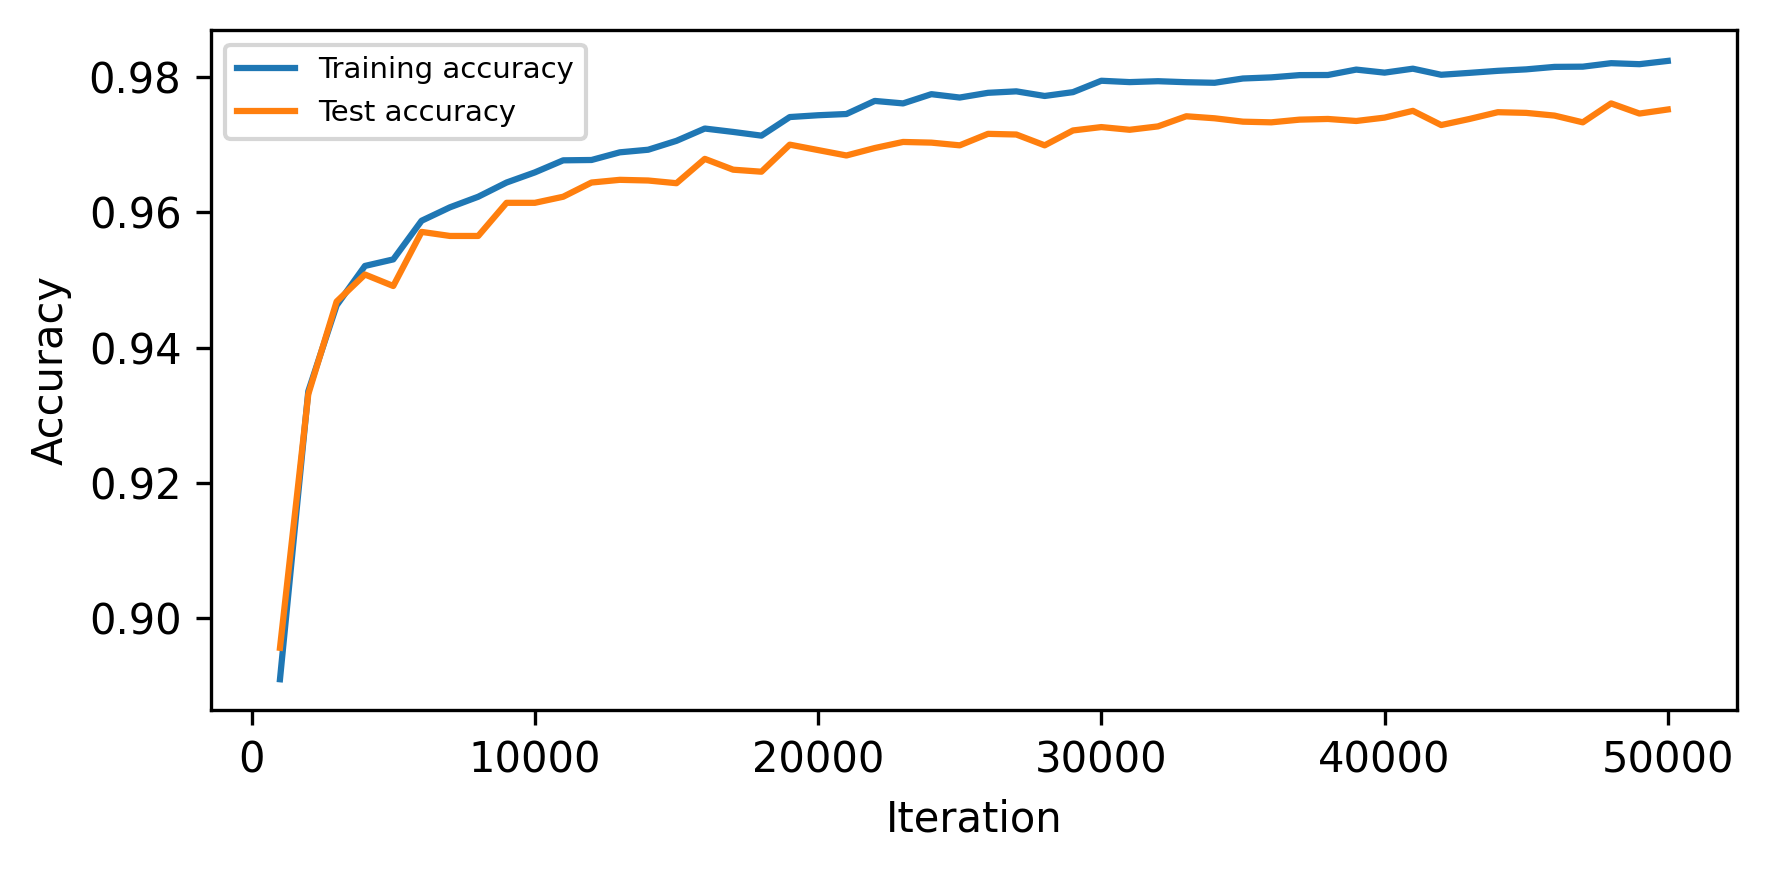

In [34]:
# SGD implementation for NN classifier.
tic = time.time()
Loss, Acc_train, Acc_test, t = minibatch_sgd_nn_l(B = 10, lr = 1e-3, k=40)
toc = time.time()
print(f"Training time: {toc - tic:.2f} sec")
# plot loss
# Plot_Loss_Acc(t, Loss, Acc)
Plot_Acc(t, Acc_train, Acc_test)

## Neural network classifier with logistic loss with k = 200

epoch1
Iteration: [1000/5000], Training loss: 0.2036, Training accuracy:  90.81%, Test accuracy:  91.10%
Iteration: [2000/5000], Training loss: 0.1000, Training accuracy:  94.44%, Test accuracy:  94.18%
Iteration: [3000/5000], Training loss: 0.1447, Training accuracy:  95.25%, Test accuracy:  95.03%
Iteration: [4000/5000], Training loss: 0.2213, Training accuracy:  96.39%, Test accuracy:  96.05%
Iteration: [5000/5000], Training loss: 0.0313, Training accuracy:  96.73%, Test accuracy:  96.68%
epoch2
Iteration: [1000/5000], Training loss: 0.0873, Training accuracy:  96.91%, Test accuracy:  96.71%
Iteration: [2000/5000], Training loss: 0.1154, Training accuracy:  97.49%, Test accuracy:  97.08%
Iteration: [3000/5000], Training loss: 0.1510, Training accuracy:  97.60%, Test accuracy:  97.18%
Iteration: [4000/5000], Training loss: 0.0879, Training accuracy:  97.78%, Test accuracy:  97.38%
Iteration: [5000/5000], Training loss: 0.0710, Training accuracy:  97.84%, Test accuracy:  97.37%
epoch3

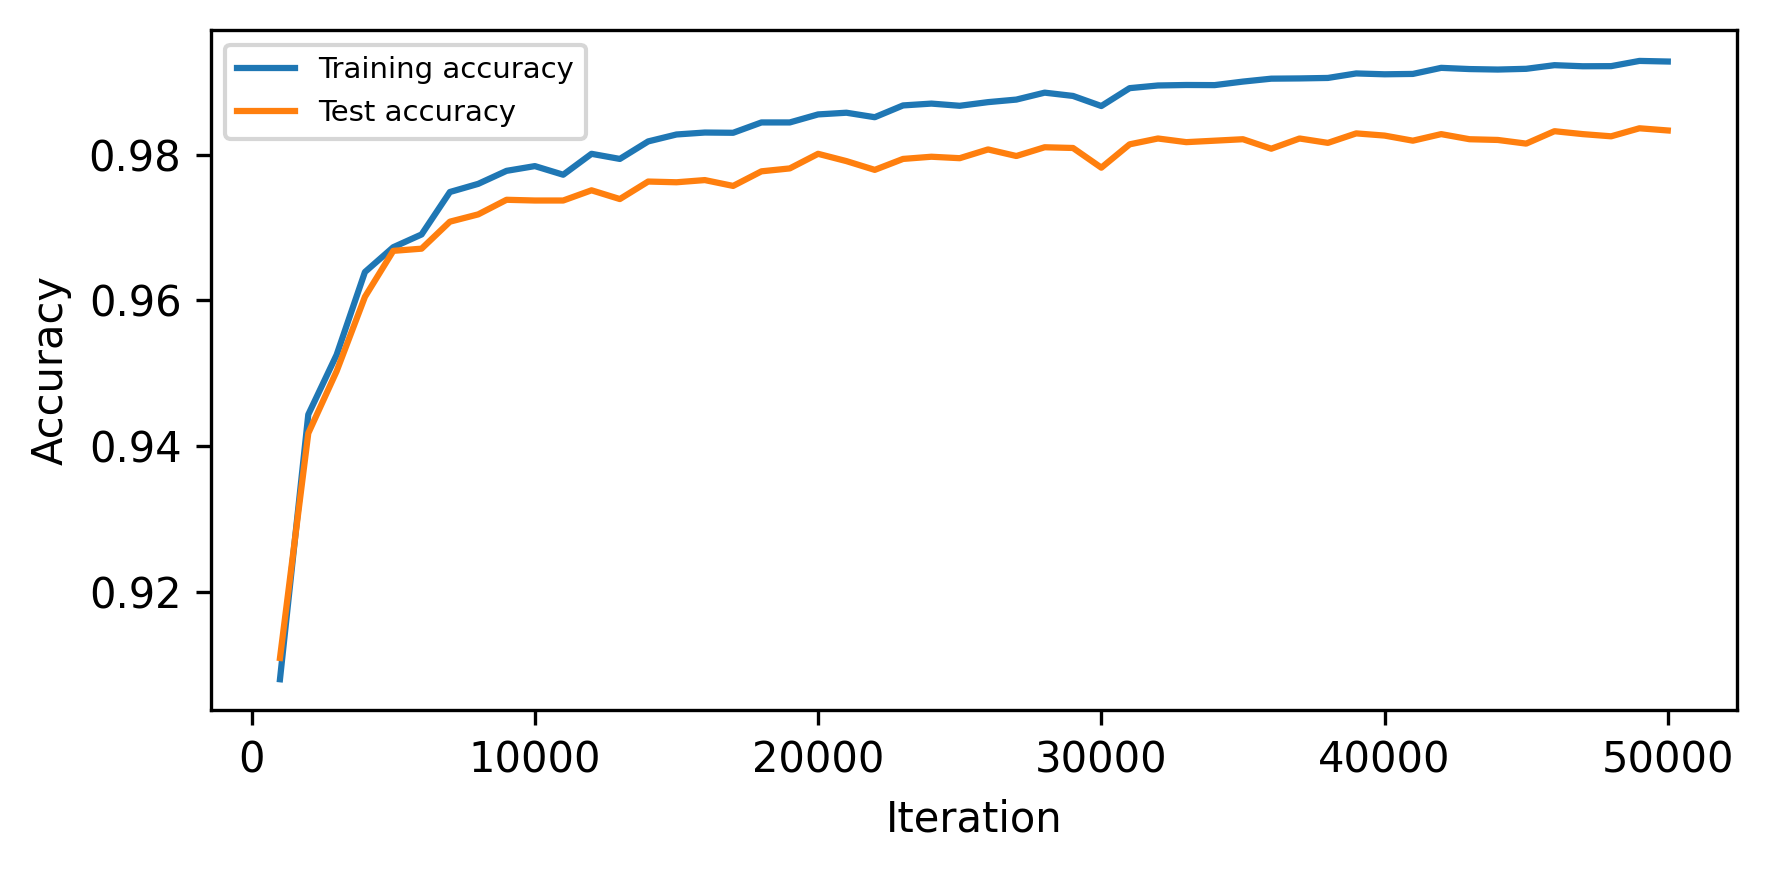

In [35]:
# SGD implementation for NN classifier.
tic = time.time()
Loss, Acc_train, Acc_test, t = minibatch_sgd_nn_l(B = 10, lr = 1e-3, k=200)
toc = time.time()
print(f"Training time: {toc - tic:.2f} sec")
# plot loss
# Plot_Loss_Acc(t, Loss, Acc)
Plot_Acc(t, Acc_train, Acc_test)